In [ ]:
# to be imported
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda, Bidirectional
from keras.layers.embeddings import Embedding
import tensorflow as tf

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ASPECT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TA & SKRIPSI/TA/disneybersih.csv')
d_tes = data['review']

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/TA & SKRIPSI/TA/disneybersih.csv')
d_tes2 = data2['review']

In [ ]:
d_tes

0      describe toilets they were probably most disgu...
1      there water bidets toilets tips here bring col...
2             drinking fountain clean toilets everywhere
3      there water fountains bottles next almost toil...
4        whole park toilets very clean beautiful gardens
                             ...                        
314     explore club restoran have pray room near toilet
315    moslems room city hall near entrance pray just...
316    there halal restaurant place pray muslims whic...
317    muslims they have rooms pray just their staff ...
318    muslim room pray city hall need perform your a...
Name: review, Length: 319, dtype: object

In [ ]:
d_tes2

0      describe toilets they were probably most disgu...
1      there water bidets toilets tips here bring col...
2             drinking fountain clean toilets everywhere
3      there water fountains bottles next almost toil...
4        whole park toilets very clean beautiful gardens
                             ...                        
314     explore club restoran have pray room near toilet
315    moslems room city hall near entrance pray just...
316    there halal restaurant place pray muslims whic...
317    muslims they have rooms pray just their staff ...
318    muslim room pray city hall need perform your a...
Name: review, Length: 319, dtype: object

In [ ]:
pip install svg.path

Class 0: 891
Class 1: 807
Class 2: 669


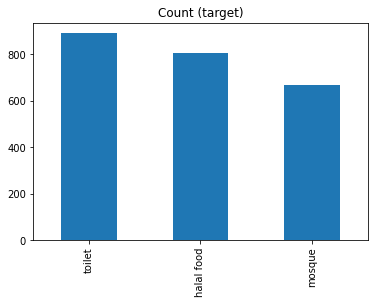

In [ ]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/TA & SKRIPSI/TA/DATASETJADI.csv')
#df_train = pd.read_csv('/content/DATASETJADI.csv')
target_count_aspect = df_train.aspek.value_counts()

print('Class 0:', target_count_aspect["toilet"])
print('Class 1:', target_count_aspect["halal food"])
print('Class 2:', target_count_aspect["mosque"])

target_count_aspect.plot(kind='bar', title='Count (target)');

In [ ]:
df_train_aspect = df_train.loc[df_train['aspek'].isin(["toilet", "halal food", "mosque"])]

In [ ]:
count_class_0_aspect, count_class_1_aspect, count_class_2_aspect = df_train_aspect.aspek.value_counts()

df_class_0_aspect = df_train_aspect[df_train_aspect['aspek'] == "toilet"]
df_class_1_aspect = df_train_aspect[df_train_aspect['aspek'] == "halal food"]
df_class_2_aspect = df_train_aspect[df_train_aspect['aspek'] == "mosque"]

Random over-sampling:
mosque        891
halal food    891
toilet        891
Name: aspek, dtype: int64


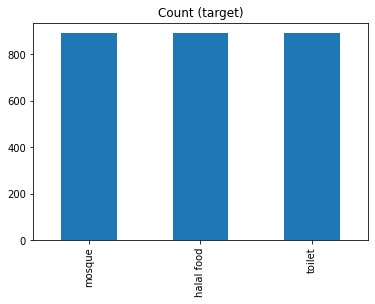

In [ ]:
df_class_1_over_aspect = df_class_1_aspect.sample(count_class_0_aspect, replace=True)
df_class_2_over_aspect = df_class_2_aspect.sample(count_class_0_aspect, replace=True)
df_test_over_aspect = pd.concat([df_class_0_aspect, df_class_1_over_aspect, df_class_2_over_aspect], axis=0)

print('Random over-sampling:')
print(df_test_over_aspect.aspek.value_counts())

df_test_over_aspect.aspek.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df_test_over_aspect.head()

,review,sentimen,aspek
408,worth visit mosque asian arabic styles avoid b...,negative,toilet
411,come lunch crappy tourist trap guide lots cool...,positive,toilet
674,hour late night lounge provided fantastic envi...,positive,toilet
675,recommend lounge clean food cheap nasty toilet...,negative,toilet
676,stay included travel company change flight hou...,negative,toilet


In [ ]:
cols = ['aspek','review']
d_aspect = df_test_over_aspect[cols]

d_aspect=d_aspect[d_aspect['review'].notnull()]

d_aspect=d_aspect[d_aspect['aspek'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

print(np.unique(y_aspect, return_counts=True))

(array(['halal food', 'mosque', 'toilet'], dtype=object), array([891, 891, 891]))


In [ ]:
print(d_aspect)

       aspek                                             review
0     toilet  worth visit mosque asian arabic styles avoid b...
1     toilet  come lunch crappy tourist trap guide lots cool...
2     toilet  hour late night lounge provided fantastic envi...
3     toilet  recommend lounge clean food cheap nasty toilet...
4     toilet  stay included travel company change flight hou...
...      ...                                                ...
2668  mosque  pros visit many colourful fish improve facilit...
2669  mosque  years mosque built enjoyed historical prayed i...
2670  mosque  people muslim quarter dont ignore dont care th...
2671  mosque  can not love wondering areas enjoyable round b...
2672  mosque  beiyuanmen street list visiting xian foodies r...

[2673 rows x 2 columns]


In [ ]:
len(d_aspect)

2673

In [ ]:
len(y_aspect)

2673

In [ ]:
tk_aspect = Tokenizer()

In [ ]:
text_aspect = d_aspect['review'].values
maxlen_aspect = max([len(i.split()) for i in text_aspect])

tk_aspect.fit_on_texts(text_aspect)
x_aspect = tk_aspect.texts_to_sequences(x_aspect)
x_aspect = sequence.pad_sequences(x_aspect, maxlen_aspect)
vocab_aspect = max([len(tk_aspect.word_index)]) + 1
print(x_aspect)

[[   0    0    0 ...  748  147  997]
 [   0    0    0 ...    6  432  112]
 [   0    0    0 ...  110   11  160]
 ...
 [   0    0    0 ...   19    8 2179]
 [   0    0    0 ... 1969  878   41]
 [   0    0    0 ...  297  151   88]]


In [ ]:
print("vocab aspect : " + str(vocab_aspect))
print("maxlen aspect: " + str(maxlen_aspect))

vocab aspect : 6943
maxlen aspect: 343


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y_aspect = LabelEncoder()
y_aspect = labelencoder_Y_aspect.fit_transform(y_aspect)
print(np.unique(y_aspect, return_counts=True))

(array([0, 1, 2]), array([891, 891, 891]))


In [ ]:
from tensorflow.keras import utils as np_utils
y_aspect = np_utils.to_categorical(y_aspect, num_classes= 3)

print(y_aspect)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_aspect, x_test_aspect, y_train_aspect, y_test_aspect, indices_train_aspect, indices_test_aspect = train_test_split(x_aspect, y_aspect, d_aspect.index, test_size=0.33, random_state=42)

print(x_train_aspect.shape)
print(y_train_aspect.shape)
print(x_test_aspect.shape)
print(y_test_aspect.shape)
print(y_aspect)

(1790, 343)
(1790, 3)
(883, 343)
(883, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
x_train_aspect = sequence.pad_sequences(x_train_aspect, maxlen=maxlen_aspect)
x_test_aspect = sequence.pad_sequences(x_test_aspect, maxlen=maxlen_aspect)
print('x_train aspect shape:', x_train_aspect.shape)
print('x_test aspect shape:', x_test_aspect.shape)

x_train aspect shape: (1790, 343)
x_test aspect shape: (883, 343)


In [ ]:
embedding_dims = 64
filters = 300
kernel_size = 10
hidden_dims = 128
dropout = 0.5
lstm_unit = 64

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [ ]:
from keras.utils.vis_utils import plot_model
#plot_model(model_aspect, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model_aspect = Sequential()
model_aspect.add(Embedding(vocab_aspect,
                embedding_dims,
                input_length=maxlen_aspect))
model_aspect.add(Dropout(dropout))

model_aspect.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))

model_aspect.add(GlobalMaxPooling1D())
model_aspect.add(Dense(hidden_dims))
model_aspect.add(Dropout(dropout))
model_aspect.add(Activation('relu'))

model_aspect.add(Dense(3))
model_aspect.add(Activation('softmax'))

model_aspect.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_aspect = model_aspect.fit(x_train_aspect, y_train_aspect,
          batch_size=64,
          epochs=8,
          validation_split = 0.33,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

#plot_model(model_aspect, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/8
19/19 [==============================] - 14s 666ms/step - loss: 1.1002 - accuracy: 0.3495 - val_loss: 1.0918 - val_accuracy: 0.3519
Epoch 2/8
19/19 [==============================] - 12s 655ms/step - loss: 1.0669 - accuracy: 0.4445 - val_loss: 1.0231 - val_accuracy: 0.8020
Epoch 3/8
19/19 [==============================] - 12s 654ms/step - loss: 0.8798 - accuracy: 0.7781 - val_loss: 0.6122 - val_accuracy: 0.9729
Epoch 4/8
19/19 [==============================] - 12s 650ms/step - loss: 0.3195 - accuracy: 0.9550 - val_loss: 0.1149 - val_accuracy: 0.9797
Epoch 5/8
19/19 [==============================] - 12s 652ms/step - loss: 0.1033 - accuracy: 0.9741 - val_loss: 0.0726 - val_accuracy: 0.9814
Epoch 6/8
19/19 [==============================] - 13s 663ms/step - loss: 0.0549 - accuracy: 0.9850 - val_loss: 0.0602 - val_accuracy: 0.9797
Epoch 7/8
19/19 [==============================] - 13s 664ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0594 - val_accuracy: 0.9848
Epoch 

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [ ]:
# Save the model
filepath = './saved_model_aspect'
save_model(model_aspect, filepath)

INFO:tensorflow:Assets written to: ./saved_model_aspect/assets


In [ ]:
# Load the model
filepath = './saved_model_aspect'
model_aspect = load_model(filepath, compile = True)

# Predict Aspect

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

In [ ]:
aspect = ['mosque','toilet','halal food']
sentence = ['clean prayer room']
sequence2 = tk_aspect.texts_to_sequences(sentence)
test = pad_sequences(sequence2, maxlen=maxlen_aspect)
aspect[np.around(model_aspect.predict(test), decimals=0).argmax(axis=1)[0]]

'toilet'

In [ ]:
def ABSA_aspect(list):
    rsl = []
    aspect = ['mosque','toilet','halal food']
    hasil_aspect = list;
    for val in hasil_aspect:
      sequence2 = tk_aspect.texts_to_sequences([val])
      test = sequence.pad_sequences(sequence2, maxlen=maxlen_aspect)
      #hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict(test)])
      hsl = aspect[np.around(model_aspect.predict(test), decimals=0).argmax(axis=1)[0]]
      rsl.append(hsl)
    return rsl

In [ ]:
kal_aspect = ["nice toilet",
              "clean mosque",
              "many halal food"]

print(ABSA_aspect(kal_aspect))

['halal food', 'toilet', 'mosque']


# Evaluate Aspect

In [ ]:
predict_x=model_aspect.predict(x_test_aspect)
new_review_category_aspect=np.argmax(predict_x,axis=1)

In [ ]:
decode_aspect = np.argmax(y_test_aspect, axis=1)

In [ ]:
decode_aspect

array([2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
lab_aspect = ["toilet", "halal food", "mosque"]

In [ ]:
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

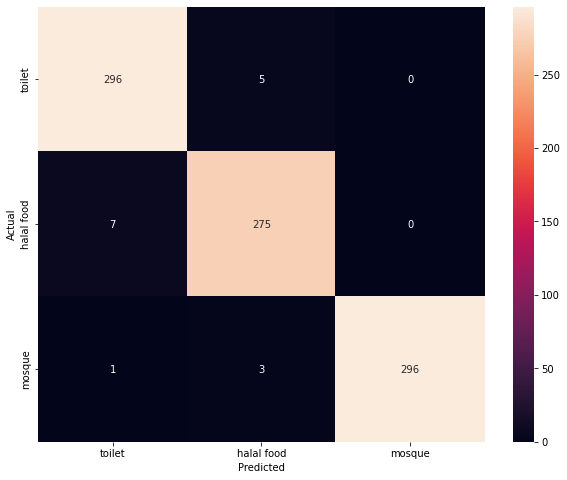

In [ ]:
conf_matrix(new_review_category_aspect, decode_aspect, lab_aspect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_aspect, decode_aspect)

0.9818799546998868

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_aspect, decode_aspect))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       301
           1       0.97      0.98      0.97       282
           2       1.00      0.99      0.99       300

    accuracy                           0.98       883
   macro avg       0.98      0.98      0.98       883
weighted avg       0.98      0.98      0.98       883



In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_aspect, decode_aspect))
print('F1 score:', f1_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Recall:', recall_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Precision:', precision_score(new_review_category_aspect, decode_aspect, average='macro'))

Accuracy: 0.9818799546998868
F1 score: 0.98175077157729
Recall: 0.9817442253167142
Precision: 0.9818052197631889


In [ ]:
accr_aspect = model_aspect.evaluate(x_test_aspect,y_test_aspect)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_aspect[0],accr_aspect[1]))

28/28 [==============================] - 2s 81ms/step - loss: 0.0888 - accuracy: 0.9819
Test set
  Loss: 0.089
  Accuracy: 0.982


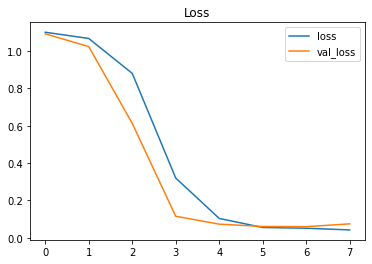

In [ ]:
plt.title('Loss')
plt.plot(history_aspect.history['loss'], label='loss')
plt.plot(history_aspect.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

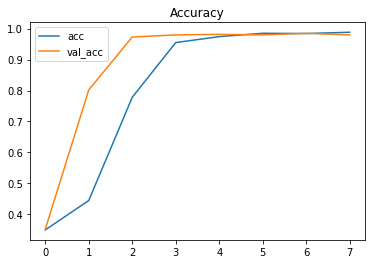

In [ ]:
plt.title('Accuracy')
plt.plot(history_aspect.history['accuracy'], label='acc')
plt.plot(history_aspect.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show();

# Sentiment

Class 0: 1904
Class 1: 463


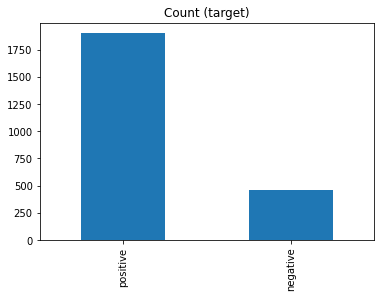

In [ ]:
target_count_sent = df_train.sentimen.value_counts()
print('Class 0:', target_count_sent["positive"])
print('Class 1:', target_count_sent["negative"])

target_count_sent.plot(kind='bar', title='Count (target)');

In [ ]:
#  net             pos            neg
count_class_0_sent, count_class_1_sent = df_train.sentimen.value_counts()

# Divide by class
df_class_0_sent = df_train[df_train['sentimen'] == "positive"]
df_class_1_sent = df_train[df_train['sentimen'] == "negative"]

Random over-sampling:
negative    1904
positive    1904
Name: sentimen, dtype: int64


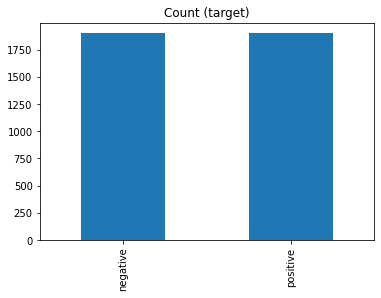

In [ ]:
df_class_1_over_sent = df_class_1_sent.sample(count_class_0_sent, replace=True)
df_test_over_sent = pd.concat([df_class_0_sent, df_class_1_over_sent], axis=0)

print('Random over-sampling:')
print(df_test_over_sent.sentimen.value_counts())

df_test_over_sent.sentimen.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
cols_sent = ['sentimen','review']
d_sent = df_test_over_sent[cols_sent]
d_sent = d_sent[d_sent['review'].notnull()]

d_sent = d_sent[d_sent['sentimen'].notnull()]

In [ ]:
len(d_sent)

3808

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
#set_random_seed(2)

In [ ]:
d_sent.reset_index(drop=True,inplace=True)
x_sent = d_sent.iloc[:, 1].values
y_sent = d_sent.iloc[:, 0].values

In [ ]:
tk_sent = Tokenizer()

In [ ]:
text_sent = d_sent['review'].values
maxlen_sent = max([len(i.split()) for i in text_sent])
tk_sent.fit_on_texts(text_sent) # each word in text is given a unique integer number
x_sent = tk_sent.texts_to_sequences(x_sent) # represent a completely new set of word sequence
x_sent = sequence.pad_sequences(x_sent, maxlen_sent) # to ensure that all sequences in a list have the same length
vocab_sent = max([len(tk_sent.word_index)]) + 1
print(x_sent)

[[   0    0    0 ...   10   16    4]
 [   0    0    0 ...   16   48   56]
 [   0    0    0 ...    1   84  509]
 ...
 [   0    0    0 ...  936  135  679]
 [   0    0    0 ...   16   23 2691]
 [   0    0    0 ...  127  225    5]]


In [ ]:
print("vocab sentiment : " + str(vocab_sent))
print("maxlen sentiment : " + str(maxlen_sent))

vocab sentiment : 8039
maxlen sentiment : 580


In [ ]:
from sklearn.preprocessing import LabelEncoder
# encoding the levels of categorical features into numeric values
labelencoder_Y_sent = LabelEncoder()
y_sent = labelencoder_Y_sent.fit_transform(y_sent)
print(y_sent)
print(np.unique(y_sent, return_counts=True))

[1 1 1 ... 0 0 0]
(array([0, 1]), array([1904, 1904]))


In [ ]:
from tensorflow.keras import utils as np_utils
y_sent = np_utils.to_categorical(y_sent, num_classes= 2)
# One hot encoded
print(y_sent)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_split = 0.33
from sklearn.model_selection import train_test_split
x_train_sent, x_test_sent, y_train_sent, y_test_sent, indices_train_sent, indices_test_sent = train_test_split(x_sent, y_sent, d_sent.index, test_size=0.33, random_state=42)

print(x_train_sent.shape)
print(y_train_sent.shape)
print(x_test_sent.shape)
print(y_test_sent.shape)
print(y_sent)

(2551, 580)
(2551, 2)
(1257, 580)
(1257, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
x_train_sent = sequence.pad_sequences(x_train_sent, maxlen=maxlen_sent)
x_test_sent = sequence.pad_sequences(x_test_sent, maxlen=maxlen_sent)
print('x_train_sent shape:', x_train_sent.shape)
print('x_test_sent shape:', x_test_sent.shape)

x_train_sent shape: (2551, 580)
x_test_sent shape: (1257, 580)


In [ ]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.25
lstm_unit = 64

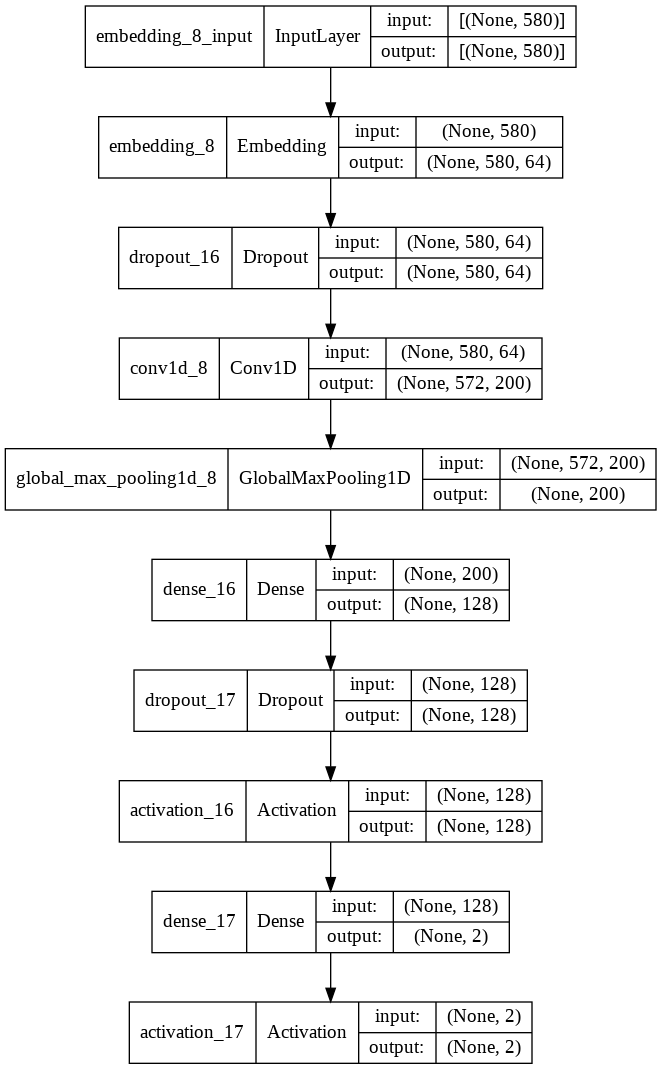

In [ ]:
from keras.utils.vis_utils import plot_model

model_sent = Sequential()

model_sent.add(Embedding(vocab_sent,
               embedding_dims,
               input_length=maxlen_sent))
model_sent.add(Dropout(dropout))
model_sent.add(Conv1D(filters,
               kernel_size,
               padding='valid',
               activation='relu',
               strides=1))
model_sent.add(GlobalMaxPooling1D())

model_sent.add(Dense(hidden_dims))
model_sent.add(Dropout(dropout))
model_sent.add(Activation('relu'))

model_sent.add(Dense(2))
model_sent.add(Activation('sigmoid'))

plot_model(model_sent, to_file='model_sent6.png', show_shapes=True, show_layer_names=True)
#model_sent.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

#history_sent = model_sent.fit(x_train_sent, y_train_sent,
#          batch_size=64,
#          epochs=7,
#          validation_split = 0.33,
#          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

In [ ]:
# Save the model
filepath = './saved_model_sent'
save_model(model_sent, filepath)

# Load the model
model_sent = load_model(filepath, compile = True)

INFO:tensorflow:Assets written to: ./saved_model_sent/assets


# Predict Sentiment

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = maxlen_sent

tokenizer = Tokenizer(num_words=max_words)

In [ ]:
aspect = ['negative','positive']
sentence = ['building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days']
sequence2 = tokenizer.texts_to_sequences(sentence)
test = pad_sequences(sequence2, maxlen=max_len)
aspect[np.around(model_sent.predict(test), decimals=0).argmax(axis=1)[0]]

'positive'

In [ ]:
def ABSA_sent(list):
    rsl = []
    aspect = ['negative','positive']
    hasil_aspect = list;
    for val in hasil_aspect:
      sequence2 = tk_sent.texts_to_sequences([val])
      test = sequence.pad_sequences(sequence2, maxlen=maxlen_sent)
      #hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict(test)])
      hsl = aspect[np.around(model_sent.predict(test), decimals=0).argmax(axis=1)[0]]
      rsl.append(hsl)
    return rsl

In [ ]:
kal_sent = ["Surely hard to get HALAL food for muslim in here. ",
            "I can’t describe the toilets they were probably the most dirty I’ve ever seen "]

print(ABSA_sent(kal_sent))

['negative', 'negative']


# Evaluate Sentiment

In [ ]:
predict_x=model_sent.predict(x_test_sent)
new_review_category_sent=np.argmax(predict_x,axis=1)

In [ ]:
decode_sent = np.argmax(y_test_sent, axis=1)

In [ ]:
lab_sent = ["negative","positive"]

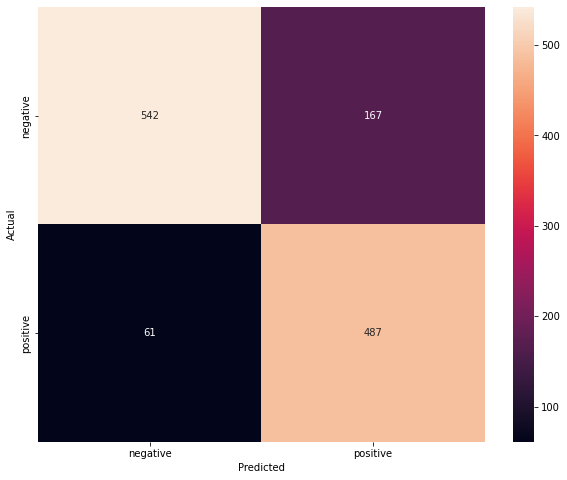

In [ ]:
conf_matrix(new_review_category_sent, decode_sent, lab_sent)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_sent, decode_sent)

0.8186157517899761

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_sent, decode_sent))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       709
           1       0.74      0.89      0.81       548

    accuracy                           0.82      1257
   macro avg       0.82      0.83      0.82      1257
weighted avg       0.83      0.82      0.82      1257



In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_sent, decode_sent))
print('F1 score:', f1_score(new_review_category_sent, decode_sent, average='macro'))
print('Recall:', recall_score(new_review_category_sent, decode_sent, average='macro'))
print('Precision:', precision_score(new_review_category_sent, decode_sent, average='macro'))

Accuracy: 0.8186157517899761
F1 score: 0.8182678259810885
Recall: 0.8265715565255887
Precision: 0.8217437278439607


In [ ]:
accr_sent = model_sent.evaluate(x_test_sent,y_test_sent)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_sent[0],accr_sent[1]))

40/40 [==============================] - 5s 132ms/step - loss: 0.4789 - accuracy: 0.8186
Test set
  Loss: 0.479
  Accuracy: 0.819


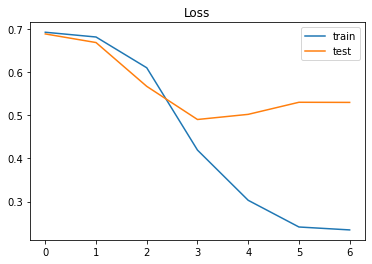

In [ ]:
plt.title('Loss')
plt.plot(history_sent.history['loss'], label='train')
plt.plot(history_sent.history['val_loss'], label='test')
plt.legend()
plt.show();

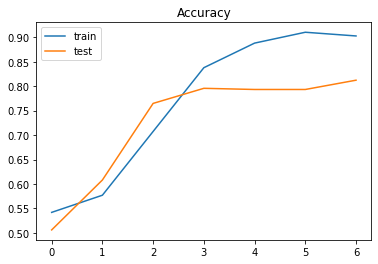

In [ ]:
plt.title('Accuracy')
plt.plot(history_sent.history['accuracy'], label='train')
plt.plot(history_sent.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Aspect Based Sentiment Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from nltk.tokenize import word_tokenize
import unicodedata
import nltk
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
import csv, pandas

In [ ]:
maxwell = pandas.read_csv('/content/drive/MyDrive/TA & SKRIPSI/TA/disneybersih.csv', usecols=["review"])
df = maxwell["review"].tolist()
maxwell.head()

,review
0,describe toilets they were probably most disgu...
1,there water bidets toilets tips here bring col...
2,drinking fountain clean toilets everywhere
3,there water fountains bottles next almost toil...
4,whole park toilets very clean beautiful gardens


In [ ]:
review = maxwell.values.tolist()

In [ ]:
review

[['describe toilets they were probably most disgusting ever seen'],
 ['there water bidets toilets tips here bring collapsible water bottle refill makeshift water bidet'],
 ['drinking fountain clean toilets everywhere'],
 ['there water fountains bottles next almost toilets toilets conditioned even portaloo ones spotless'],
 ['whole park toilets very clean beautiful gardens'],
 ['there drink fountains around toilet areas keep refilling your bottles'],
 ['toilet breaks possible whenever want'],
 ['there issue with toilets they everywhere'],
 ['toilets plentiful clean'],
 ['shocked find that regular malls even ocean park provide toilet cleaner liquid dispenser every cubicle disneyland none maybe time upgrade well'],
 ['toilets were clean'],
 ['toilets however cleaner should have queue elderly rides'],
 ['cleaner more accessible public toilets'],
 ['park clean toilets were clean'],
 ['disneyland never disappoints adult appreciate places like these their toilets hehehe smell spotless clean a

In [ ]:
len(review)

319

In [ ]:
review[16]

['bathrooms were dirty toilets ground which good boys']

In [ ]:
ABSA_sent(review[16])

['negative']

In [ ]:
i = 0
pos_list = []
neg_list = []
x_temp = []
while i < len(review):
  x = ABSA_sent(review[i])
  print(x)
  x_temp.append(x)
  if(x == ['negative']):
    y = review[i]
    neg_list.append(y)
  else:
    y = review[i]
    pos_list.append(y)
  i += 1

['positive']
['negative']
['positive']
['negative']
['positive']
['positive']
['positive']
['positive']
['positive']
['negative']
['positive']
['negative']
['negative']
['positive']
['negative']
['positive']
['negative']
['negative']
['negative']
['positive']
['negative']
['positive']
['positive']
['negative']
['negative']
['positive']
['negative']
['negative']
['positive']
['positive']
['negative']
['positive']
['positive']
['negative']
['negative']
['positive']
['negative']
['negative']
['negative']
['negative']
['negative']
['positive']
['positive']
['positive']
['negative']
['positive']
['positive']
['positive']
['negative']
['positive']
['negative']
['positive']
['positive']
['negative']
['negative']
['positive']
['positive']
['positive']
['positive']
['positive']
['positive']
['positive']
['positive']
['positive']
['negative']
['positive']
['negative']
['positive']
['positive']
['negative']
['negative']
['positive']
['negative']
['negative']
['negative']
['negative']
['positive']

In [ ]:
neg_list

[['there water bidets toilets tips here bring collapsible water bottle refill makeshift water bidet'],
 ['there water fountains bottles next almost toilets toilets conditioned even portaloo ones spotless'],
 ['shocked find that regular malls even ocean park provide toilet cleaner liquid dispenser every cubicle disneyland none maybe time upgrade well'],
 ['toilets however cleaner should have queue elderly rides'],
 ['cleaner more accessible public toilets'],
 ['disneyland never disappoints adult appreciate places like these their toilets hehehe smell spotless clean aaaaaand wait free unlimited toilet seat covers'],
 ['bathrooms were dirty toilets ground which good boys'],
 ['toilets available every minutes walk which very neat clean conditioned rest washroom outside every washroom drinking water available carry your refillable water bottles'],
 ['toilets there cleaner than before conditioned'],
 ['toilets were very convenient hygienically maintained'],
 ['toilets were pristine clean lov

In [ ]:
print(x_temp)

[['positive'], ['negative'], ['positive'], ['negative'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['negative'], ['positive'], ['negative'], ['negative'], ['positive'], ['negative'], ['positive'], ['negative'], ['negative'], ['negative'], ['positive'], ['negative'], ['positive'], ['positive'], ['negative'], ['negative'], ['positive'], ['negative'], ['negative'], ['positive'], ['positive'], ['negative'], ['positive'], ['positive'], ['negative'], ['negative'], ['positive'], ['negative'], ['negative'], ['negative'], ['negative'], ['negative'], ['positive'], ['positive'], ['positive'], ['negative'], ['positive'], ['positive'], ['positive'], ['negative'], ['positive'], ['negative'], ['positive'], ['positive'], ['negative'], ['negative'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['positive'], ['negative'], ['positive'], ['negative'], ['positive'], ['positive'], ['negative'], ['negative'], ['pos

In [ ]:
pos_list

[['describe toilets they were probably most disgusting ever seen'],
 ['drinking fountain clean toilets everywhere'],
 ['whole park toilets very clean beautiful gardens'],
 ['there drink fountains around toilet areas keep refilling your bottles'],
 ['toilet breaks possible whenever want'],
 ['there issue with toilets they everywhere'],
 ['toilets plentiful clean'],
 ['toilets were clean'],
 ['park clean toilets were clean'],
 ['toilets found everywhere clean'],
 ['toilets clean spacious'],
 ['toilets very clean'],
 ['toilets clean'],
 ['toilets very clean were walkways'],
 ['toilets were horrifying crowd madness christmas tree blocking fireworks shops were huge mess think some tourist really spoil park'],
 ['have been fortunate enough visit asian park staff were friendly park toilets clean food tasty'],
 ['toilets clean'],
 ['park spotless were every toilet went every eating area'],
 ['toilets were clean plentiful'],
 ['toilet smells urinate'],
 ['toilets clean'],
 ['brilliant toilet fa

In [ ]:
jmlpos = len(pos_list)
jmlneg = len(neg_list)
totalpos = (jmlpos)/len(review))*100
totalneg = (jmlneg)/len(review))*100
totalpos2 = "{:.2f}".format(totalpos)
totalneg2 = "{:.2f}".format(totalneg)
print("jumlah sent positif : " + str(jmlpos) + " (" + str(totalpos2) + "%)")
print("jumlah sent negatif : " + str(jmlneg) + " (" + str(totalneg2) + "%)")

jumlah sent positif : 223 (69.91%)
jumlah sent negatif : 96 (30.09%)


In [ ]:
jmlpos = 223
jmlneg = 96
totalpos2 = 69.91
totalneg2 = 30.09

In [ ]:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np

y = np.array([jmlpos, jmlneg])
mylabels = ["Apples", "Bananas"]

plt.pie(y, labels = mylabels)
plt.show()

plt.savefig(sys.stdout.buffer)
sys.stdout.flush()

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def remove_punctuation(text):
    """ Remove all punctuation in text. """
    return re.sub(r'[^\s\w]', ' ', text)

def remove_extra_space(text):
        """ Make extra space into one space. """
        text_list = text.split(' ')
        text_list_temp = []

        for word in text_list:
            if word.strip():
                text_list_temp.append(word.strip())

        return ' '.join(text_list_temp)

In [ ]:
# using list comprehension
listToStr = ' '.join(map(str, pos_list))
listToStr = remove_punctuation(listToStr)
listToStr = remove_extra_space(listToStr)

print(listToStr)

describe toilets they were probably most disgusting ever seen drinking fountain clean toilets everywhere whole park toilets very clean beautiful gardens there drink fountains around toilet areas keep refilling your bottles toilet breaks possible whenever want there issue with toilets they everywhere toilets plentiful clean toilets were clean park clean toilets were clean toilets found everywhere clean toilets clean spacious toilets very clean toilets clean toilets very clean were walkways toilets were horrifying crowd madness christmas tree blocking fireworks shops were huge mess think some tourist really spoil park have been fortunate enough visit asian park staff were friendly park toilets clean food tasty toilets clean park spotless were every toilet went every eating area toilets were clean plentiful toilet smells urinate toilets clean brilliant toilet facilities toilet pretty much well maintained lady will watch every toilet clean stall once someone finish site toilets very clean 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def remove_punctuation(text):
    """ Remove all punctuation in text. """
    return re.sub(r'[^\s\w]', ' ', text)

def remove_extra_space(text):
        """ Make extra space into one space. """
        text_list = text.split(' ')
        text_list_temp = []

        for word in text_list:
            if word.strip():
                text_list_temp.append(word.strip())

        return ' '.join(text_list_temp)

listToStr = ' '.join(map(str, pos_list))
listToStr = remove_punctuation(listToStr)
listToStr = remove_extra_space(listToStr)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(listToStr)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("pos_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

listToStrNeg = ' '.join(map(str, neg_list))
listToStrNeg = remove_punctuation(listToStrNeg)
listToStrNeg = remove_extra_space(listToStrNeg)

wordcloud2 = WordCloud(width = 1000, height = 500, background_color = 'white').generate(listToStrNeg)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig("neg_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

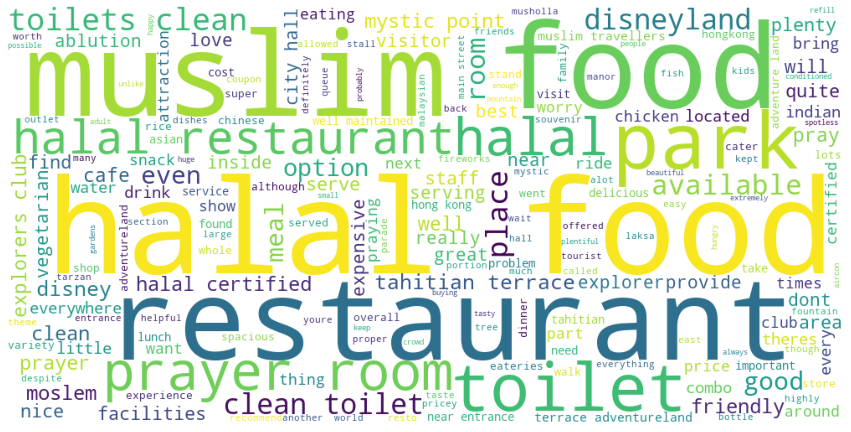

In [ ]:
#convert list to string and generate
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(listToStr)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("pos_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# using list comprehension
listToStrNeg = ' '.join(map(str, neg_list))
listToStrNeg = remove_punctuation(listToStrNeg)
listToStrNeg = remove_extra_space(listToStrNeg)

print(listToStrNeg)

there water bidets toilets tips here bring collapsible water bottle refill makeshift water bidet there water fountains bottles next almost toilets toilets conditioned even portaloo ones spotless shocked find that regular malls even ocean park provide toilet cleaner liquid dispenser every cubicle disneyland none maybe time upgrade well toilets however cleaner should have queue elderly rides cleaner more accessible public toilets disneyland never disappoints adult appreciate places like these their toilets hehehe smell spotless clean aaaaaand wait free unlimited toilet seat covers bathrooms were dirty toilets ground which good boys toilets available every minutes walk which very neat clean conditioned rest washroom outside every washroom drinking water available carry your refillable water bottles toilets there cleaner than before conditioned toilets were very convenient hygienically maintained toilets were pristine clean loves overall experience service existent toilets stink food choic

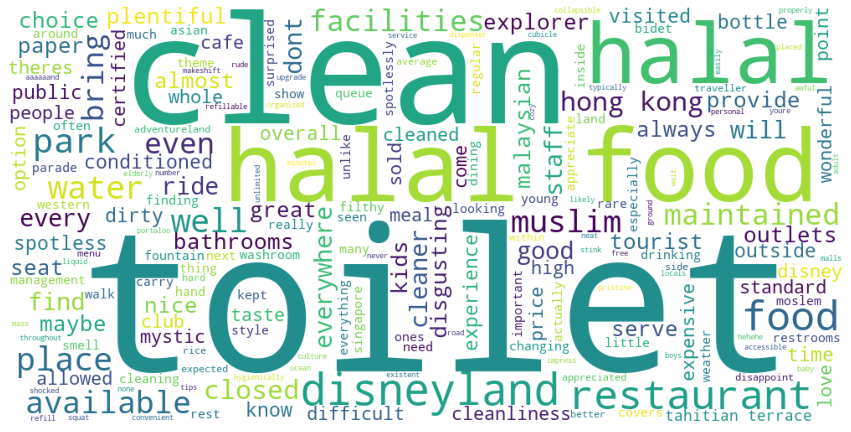

In [ ]:
#convert list to string and generate
wordcloud2 = WordCloud(width = 1000, height = 500, background_color = 'white').generate(listToStrNeg)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig("neg_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#text2 = " ".join(review for review in df.review)

In [ ]:
ABSA = ["there are so many halal food here", "the toilet is so dirty and very uncomfortable"]

sn = ABSA_sent(ABSA)
ap = ABSA_aspect(ABSA)
for val, sen, asp in zip(ABSA, sn, ap):
    print(val)
    print("Aspect: " + asp)
    print("Sentiment : " + sen)
    print()

there are so many halal food here
Aspect: mosque
Sentiment : positive

the toilet is so dirty and very uncomfortable
Aspect: halal food
Sentiment : negative



In [ ]:
import streamlit as st

In [ ]:
#blom bisa, masih nyoba nyoba

st.title('ABSA app')
text = 'Today is an amazing day!'

user_input = st.text_input("Text", text)

st.write('Sentimen:', ABSA_sent(user_input))
st.write('Aspek:', ABSA_aspect(user_input))